In [184]:
import numpy as np
import pandas as pd
import dtw
import warnings
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'JejuGothic'

import seaborn as sns
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
warnings.filterwarnings('ignore')

In [185]:
#dirr = 'C:/Users/shic/Desktop/shinhan_simon/google_drive/crawler_data/'
dirr = 'C:/Users/rsh15/Google Drive/crawler_data/'

In [186]:
kbland = pd.read_csv(dirr + 'kbland/RAA_KB부동산매매전세가격지수_수정_유승훈.csv')
court  = pd.read_csv(dirr + 'court/RAA_법원경매통계_유승훈.csv')

In [187]:
kb_df = kbland.groupby(['BASE_YM','SIDONM'],as_index=False)[
    ['TRDE_PRICE_CHNG_RT','TRDE_PRICE_INDX','TRDE_DEAL_INDX','BUY_ADVAN_INDX']].mean()
kb_df

,BASE_YM,SIDONM,TRDE_PRICE_CHNG_RT,TRDE_PRICE_INDX,TRDE_DEAL_INDX,BUY_ADVAN_INDX
0,190001,경상북도,9999.000000,9999.000000,9999.000,9999.000
1,201102,강원도,0.250000,76.133333,0.000,0.000
2,201102,경기도,0.123488,91.160465,30.600,47.200
3,201102,경상남도,0.408182,98.827273,0.000,0.000
4,201102,경상북도,0.091667,84.066667,0.000,0.000
...,...,...,...,...,...,...
2121,202106,전라남도,0.160000,104.712500,17.675,50.625
2122,202106,전라북도,0.309500,102.160000,30.875,106.425
2123,202106,제주특별자치도,0.722500,103.750000,6.975,122.075
2124,202106,충청남도,0.269722,106.244444,25.550,109.800


In [188]:
kb_df['BASE_YM'] = pd.to_datetime(kb_df['BASE_YM'],format='%Y%m')
kb_df = kb_df[kb_df['BASE_YM']>'2011-12-31']

In [189]:
court = court[court['ACTN_THNG_PRPS_BCLAS_CODE']==1]
court_df = court.groupby(['BASE_YM','SIDONM'],as_index=False).agg({
    'ACTN_ITMN':'sum','DISP_ITMN':'sum',
    'ESTM_PRICE':'sum','DISP_PRICE':'sum',
    'DISP_RT':'mean','DISP_VLUE_RT':'mean'
})
court_df

,BASE_YM,SIDONM,ACTN_ITMN,DISP_ITMN,ESTM_PRICE,DISP_PRICE,DISP_RT,DISP_VLUE_RT
0,201201,강원도,186.0,96.0,7.344097e+09,6.311601e+09,0.397222,0.532944
1,201201,경기도,1331.0,423.0,1.488306e+11,1.070992e+11,0.349628,0.690651
2,201201,경상남도,200.0,84.0,7.913980e+09,6.957851e+09,0.407783,0.596652
3,201201,경상북도,573.0,325.0,1.501624e+10,1.265864e+10,0.302792,0.468250
4,201201,광주광역시,104.0,45.0,5.406666e+09,4.899749e+09,0.473200,0.897800
...,...,...,...,...,...,...,...,...
1950,202107,전라남도,55.0,18.0,1.835214e+09,1.625933e+09,0.167500,0.314955
1951,202107,전라북도,77.0,42.0,6.050700e+09,5.501320e+09,0.284938,0.440750
1952,202107,제주특별자치도,13.0,8.0,2.049000e+09,1.715619e+09,0.575000,0.892500
1953,202107,충청남도,187.0,87.0,1.028820e+10,9.220362e+09,0.341056,0.550556


In [190]:
court_df['BASE_YM'] = pd.to_datetime(court_df['BASE_YM'],format='%Y%m')
court_df = court_df[court_df['BASE_YM']<'2021-07-01']

In [191]:
court_df = court_df.fillna(0)

In [192]:
kb_cols = kb_df.columns.values.tolist()[2:]
court_cols = court_df.columns.values.tolist()[2:]

In [193]:
print(kb_cols)
print(court_cols)

['TRDE_PRICE_CHNG_RT', 'TRDE_PRICE_INDX', 'TRDE_DEAL_INDX', 'BUY_ADVAN_INDX']
['ACTN_ITMN', 'DISP_ITMN', 'ESTM_PRICE', 'DISP_PRICE', 'DISP_RT', 'DISP_VLUE_RT']


In [194]:
regions = ['강원도','경기도','경상남도','경상북도','광주광역시','대구광역시','대전광역시','부산광역시','서울특별시','세종특별자치시','울산광역시',
           '인천광역시','전라남도','전라북도','제주특별자치도','충청남도','충청북도']

In [195]:
def min_max_scaler(dat):
    scaled = (dat-dat.min())/(dat.max()-dat.min())
    return scaled

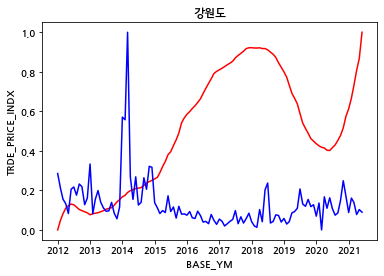

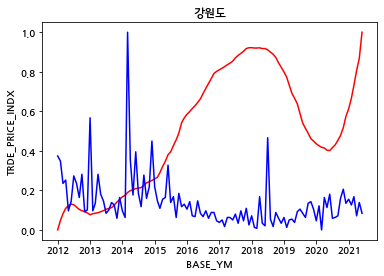

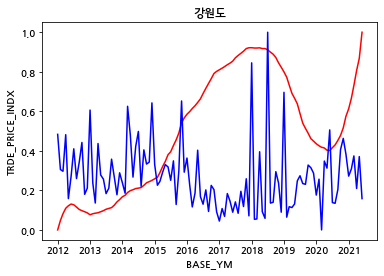

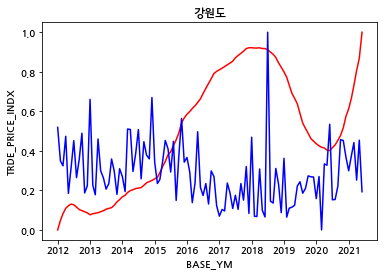

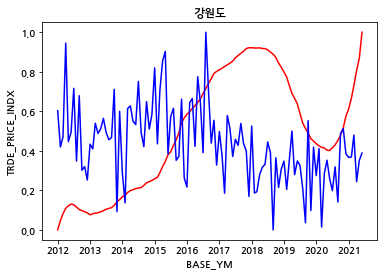

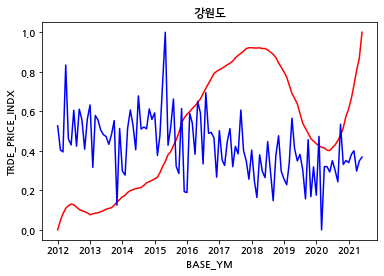

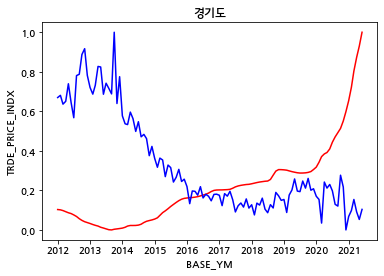

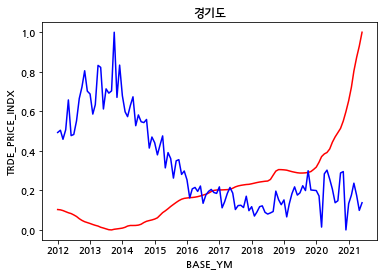

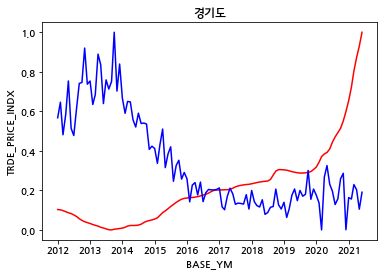

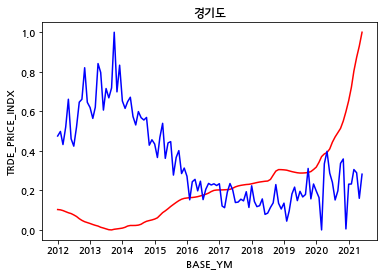

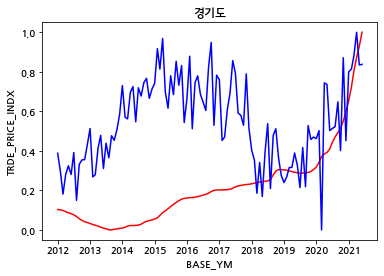

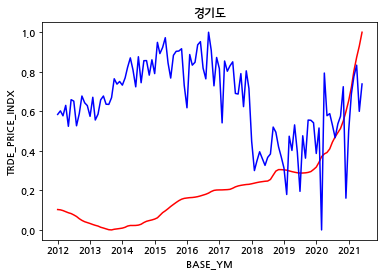

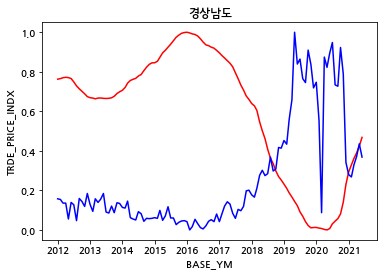

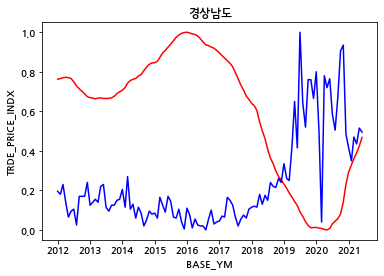

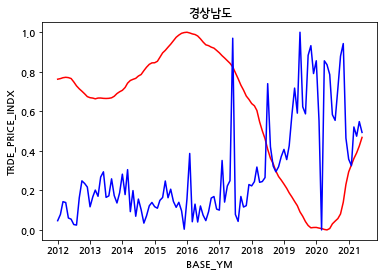

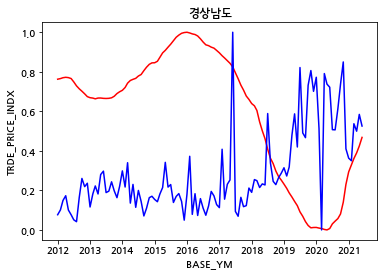

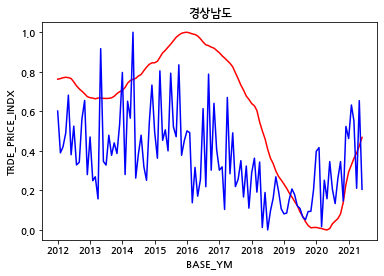

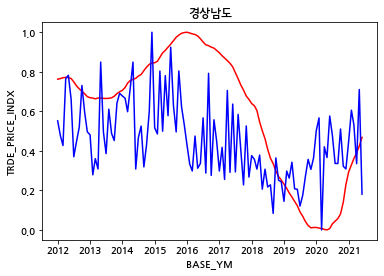

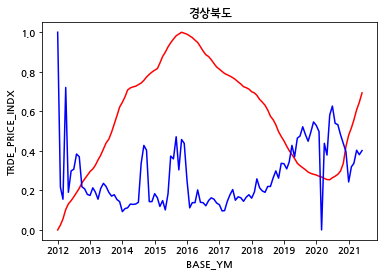

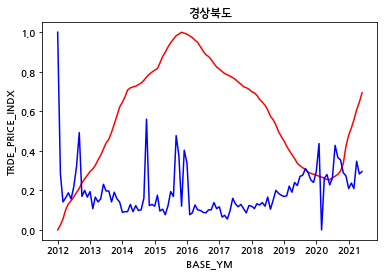

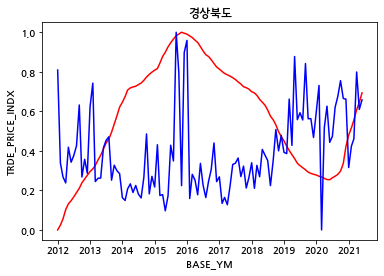

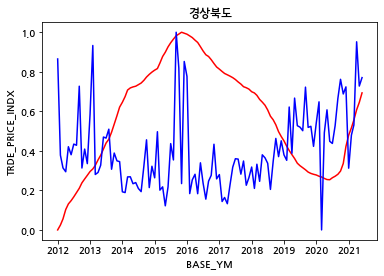

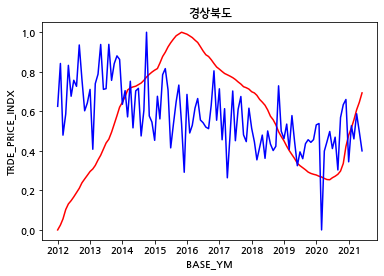

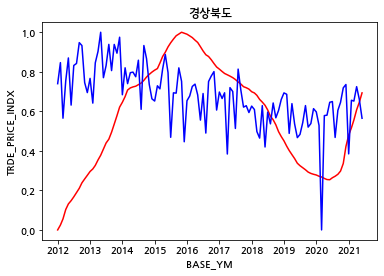

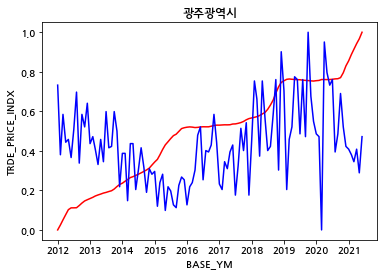

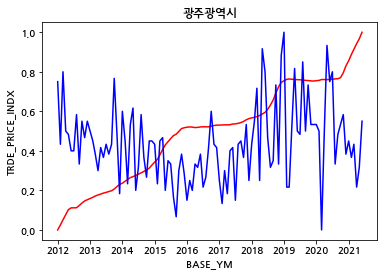

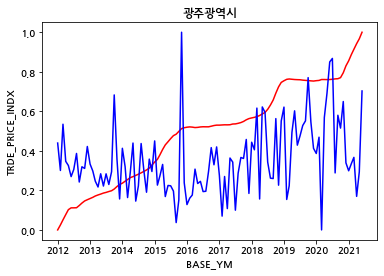

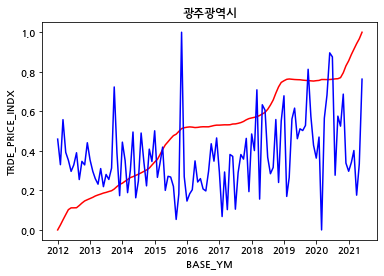

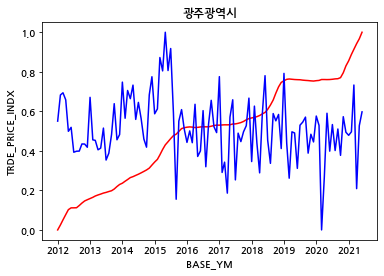

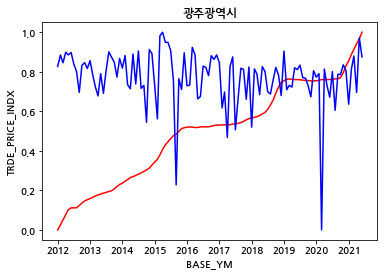

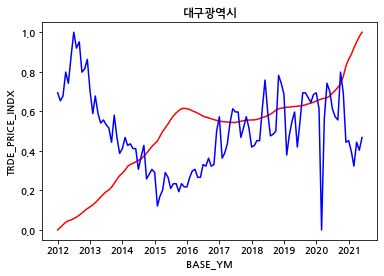

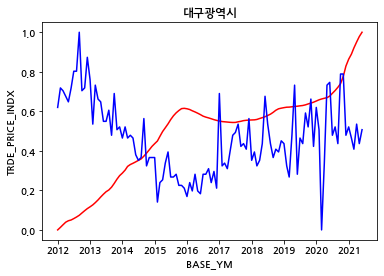

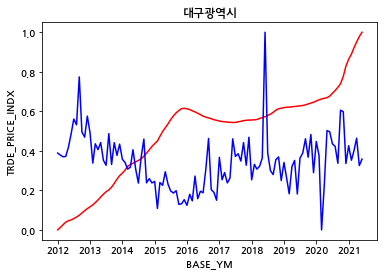

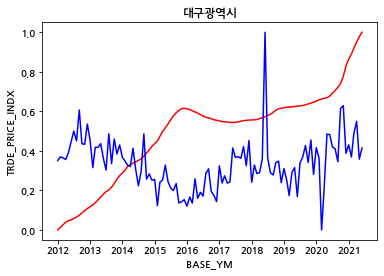

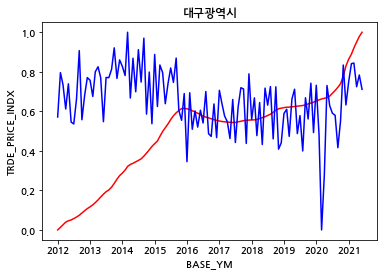

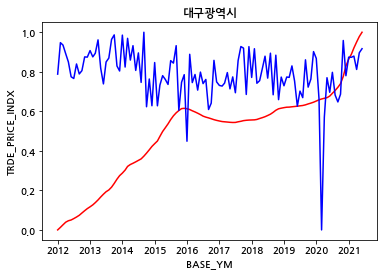

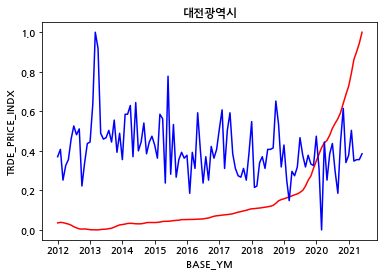

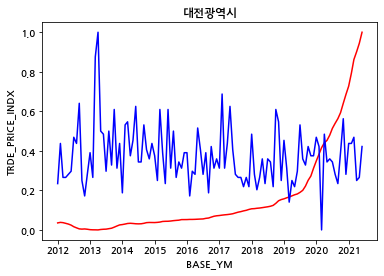

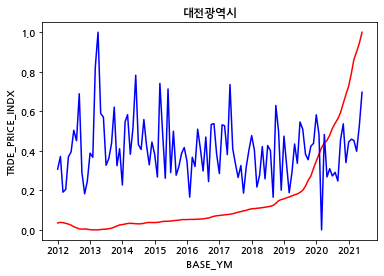

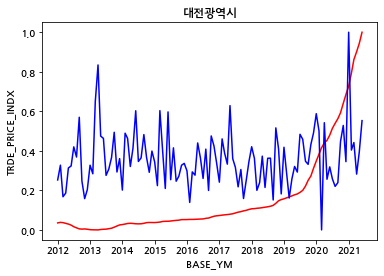

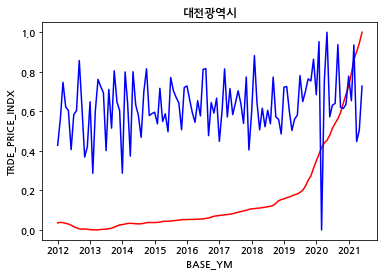

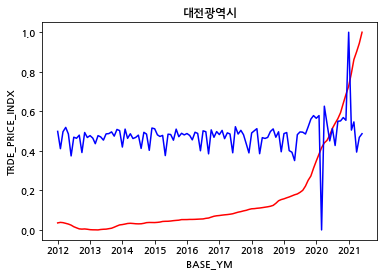

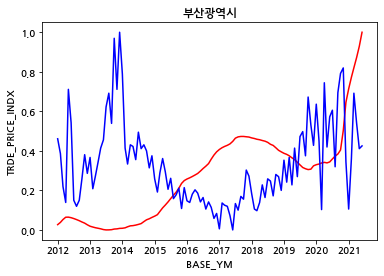

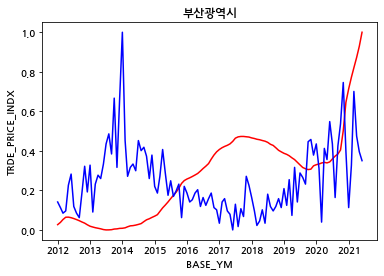

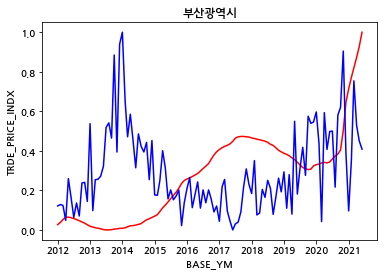

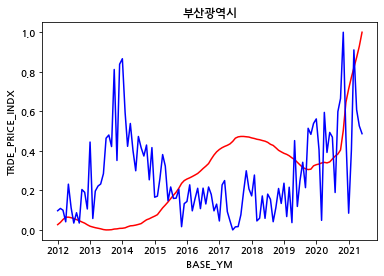

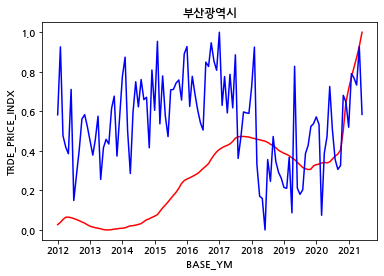

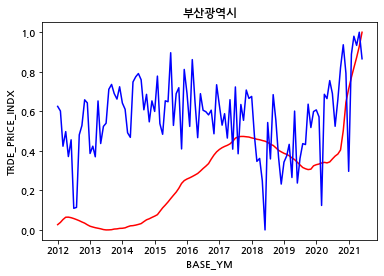

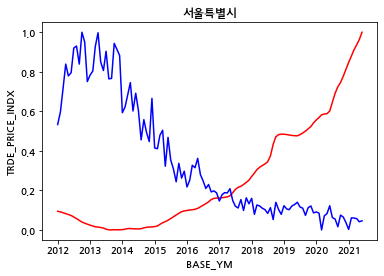

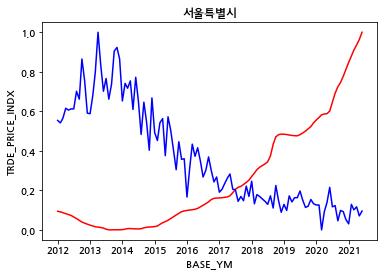

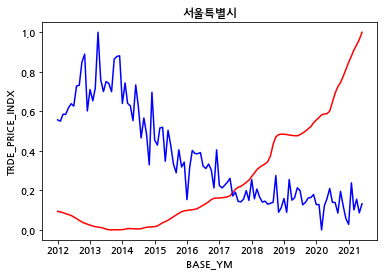

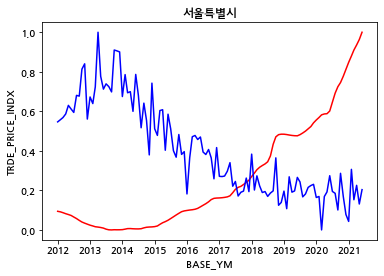

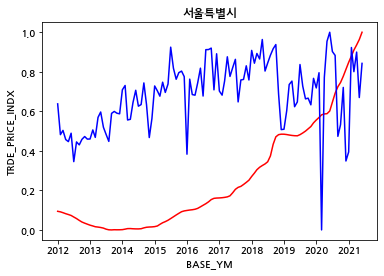

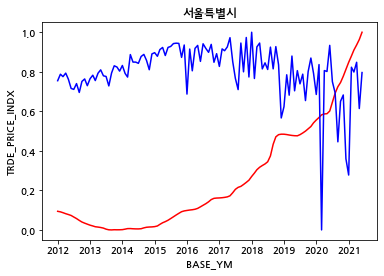

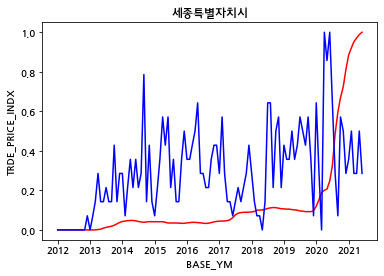

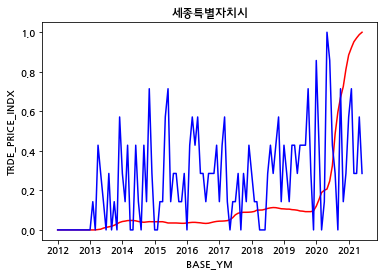

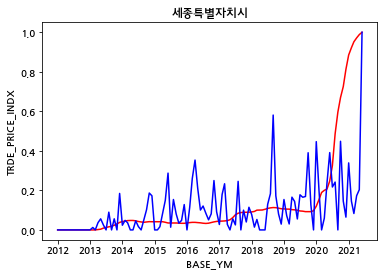

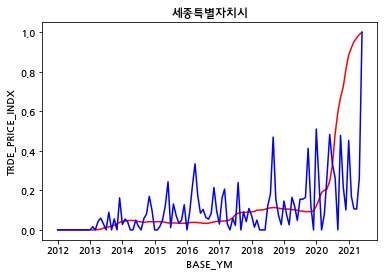

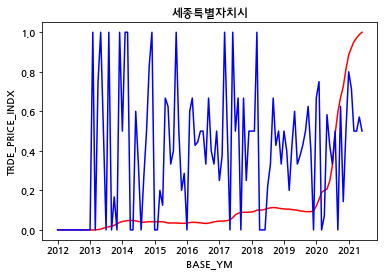

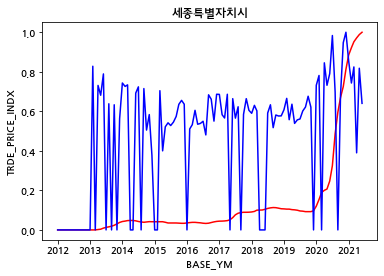

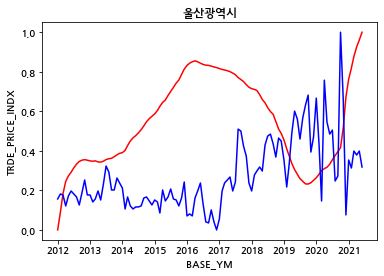

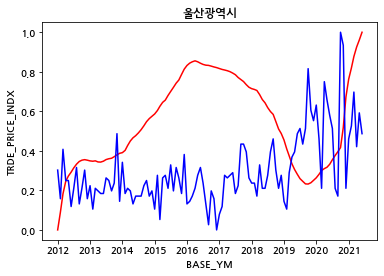

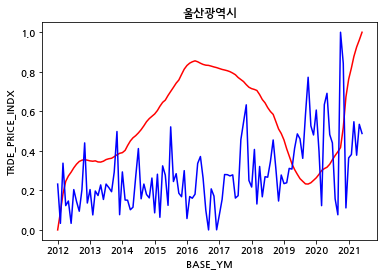

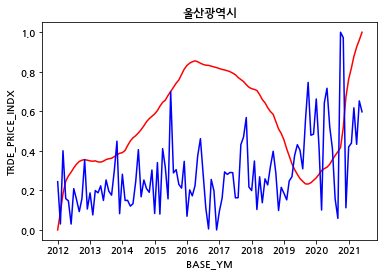

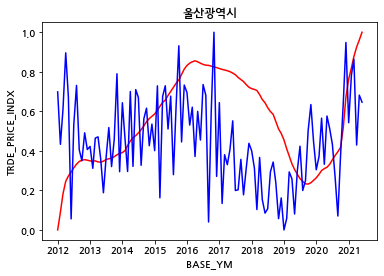

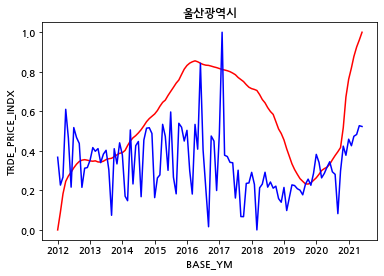

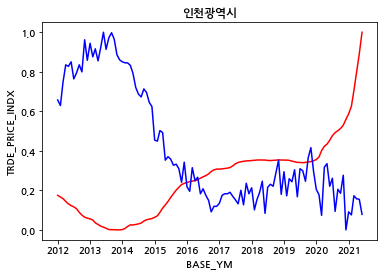

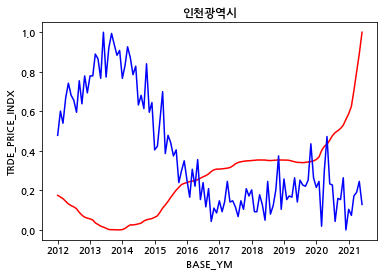

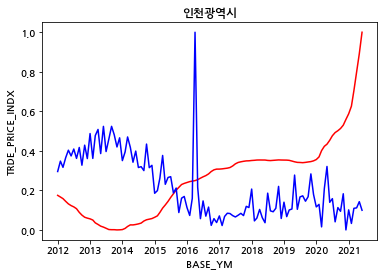

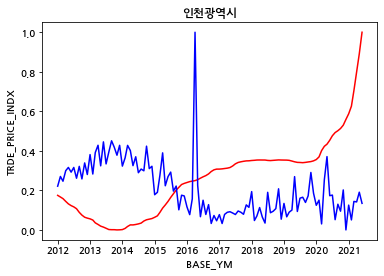

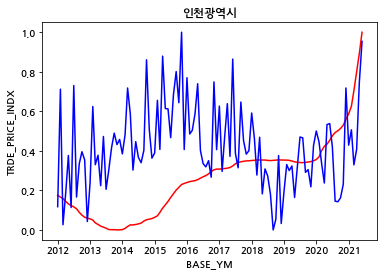

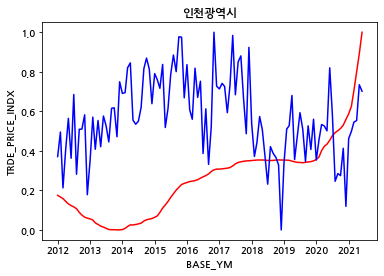

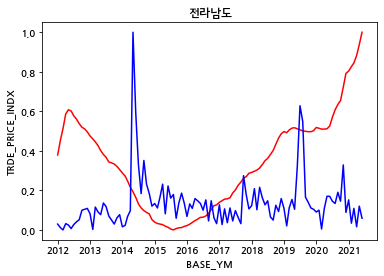

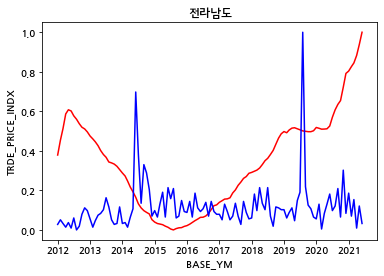

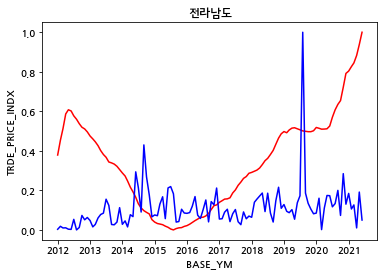

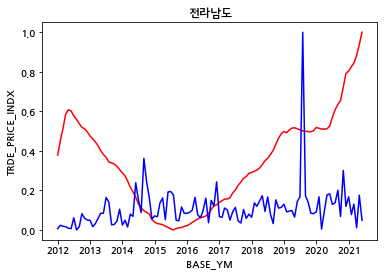

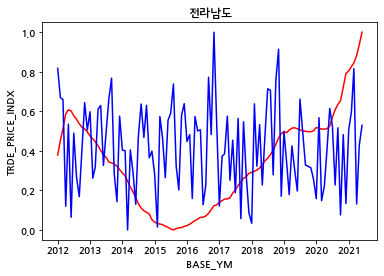

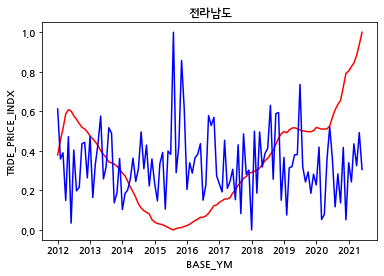

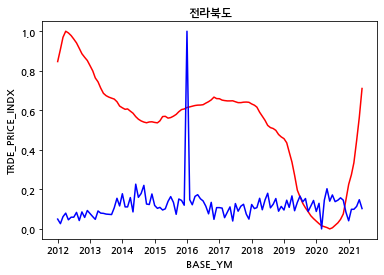

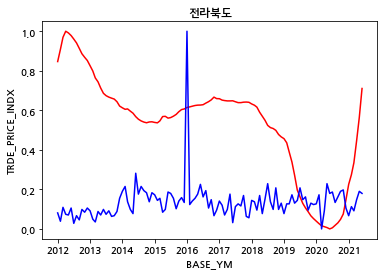

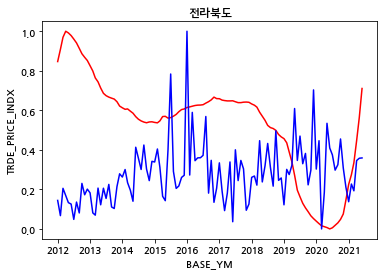

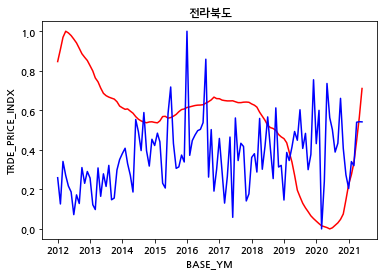

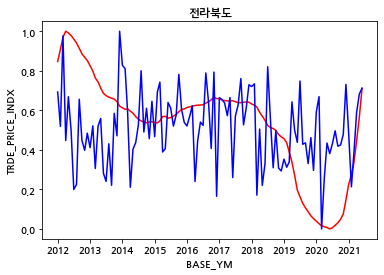

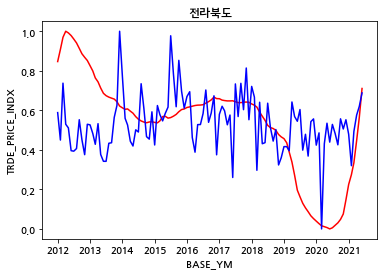

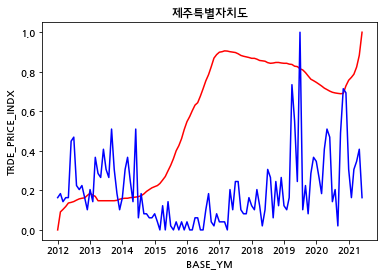

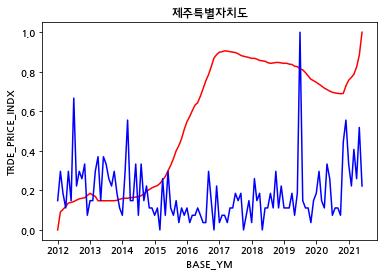

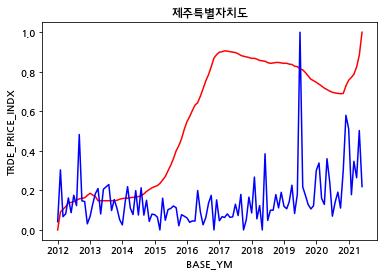

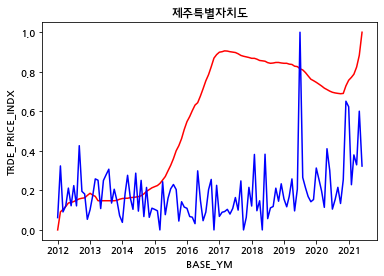

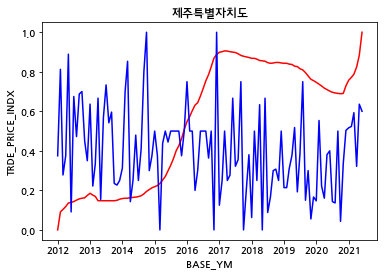

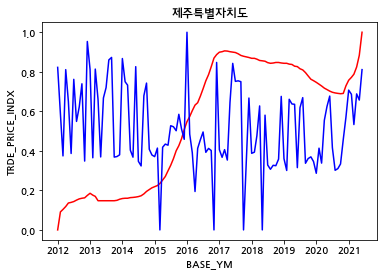

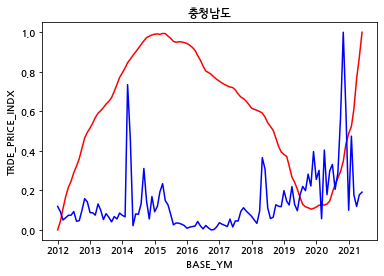

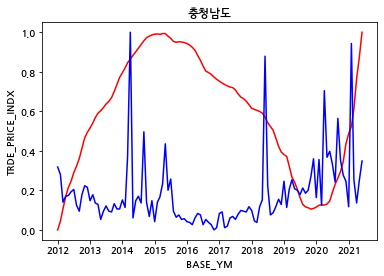

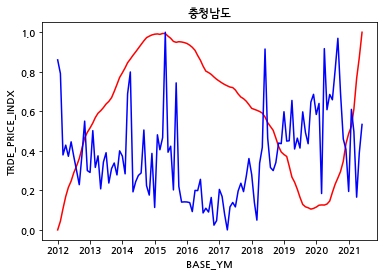

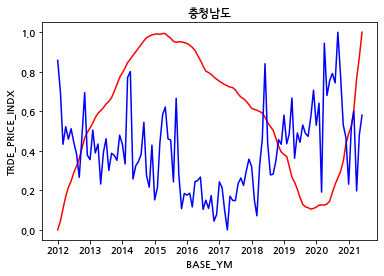

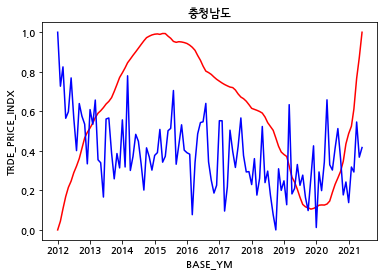

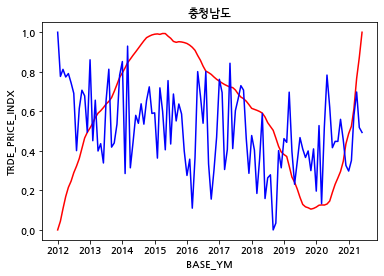

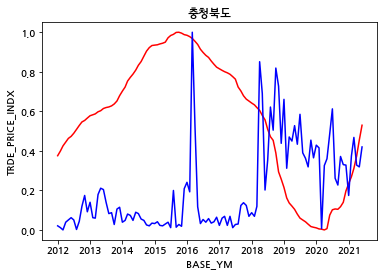

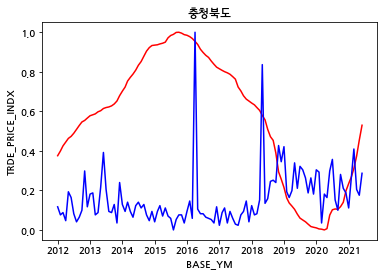

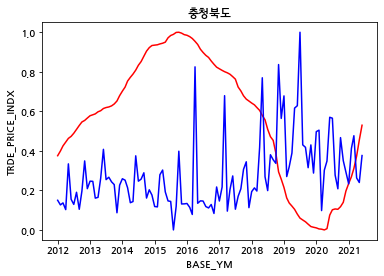

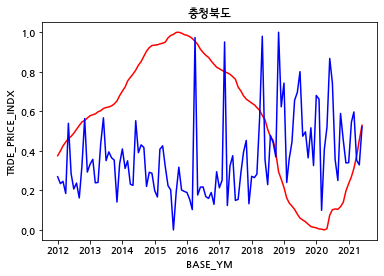

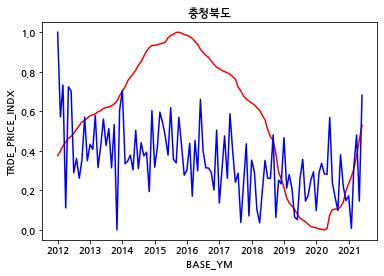

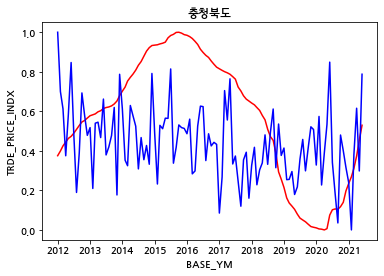

In [196]:
for rr in regions:
    kb_df_tmp = kb_df[kb_df['SIDONM']==rr]
    court_df_tmp = court_df[court_df['SIDONM']==rr]
    
    for court_col in court_cols:
        sns.lineplot(x=kb_df_tmp['BASE_YM'],y=min_max_scaler(kb_df_tmp['TRDE_PRICE_INDX']),
                     color='red')
        sns.lineplot(x=court_df_tmp['BASE_YM'],y=min_max_scaler(court_df_tmp[court_col]),
                     color='blue')
        plt.title(rr)
        plt.show()

In [197]:
result_list = []
for rr in regions:
    kb_df_tmp = kb_df[kb_df['SIDONM']==rr]
    court_df_tmp = court_df[court_df['SIDONM']==rr]
    
    for c1 in kb_cols:
        adf_result = adfuller(kb_df_tmp[c1])
        if adf_result[1] < 0.05:
            tmp_df = pd.DataFrame({
                'sidonm':rr,
                'df':'kb_df',
                'col':c1,
                'adf_statistics':adf_result[0],
                'adf_pvalue':adf_result[1],
                'adf_lag':adf_result[2],
                'adf_obs':adf_result[3]
            },index=[0])
            result_list.append(tmp_df)
        else:
            pass
        
    for c2 in court_cols:
        adf_result = adfuller(court_df_tmp[c2])
        if adf_result[1] < 0.05:
            tmp_df = pd.DataFrame({
                'sidonm':rr,
                'df':'court_df',
                'col':c2,
                'adf_statistics':adf_result[0],
                'adf_pvalue':adf_result[1],
                'adf_lag':adf_result[2],
                'adf_obs':adf_result[3]
            },index=[0])
            result_list.append(tmp_df)
        else:
            pass

## 시계열 정상성

In [198]:
granger_candidate = pd.concat(result_list).reset_index(drop=True)
granger_candidate

,sidonm,df,col,adf_statistics,adf_pvalue,adf_lag,adf_obs
0,강원도,kb_df,TRDE_DEAL_INDX,-2.879839,4.774315e-02,2,111
1,강원도,court_df,ACTN_ITMN,-5.538054,1.726670e-06,0,113
2,강원도,court_df,DISP_ITMN,-3.828965,2.624489e-03,2,111
3,강원도,court_df,DISP_RT,-2.874018,4.845389e-02,2,111
4,경기도,kb_df,TRDE_DEAL_INDX,-3.784123,3.073999e-03,2,111
...,...,...,...,...,...,...,...
56,충청남도,court_df,DISP_VLUE_RT,-7.687077,1.452022e-11,0,113
57,충청북도,kb_df,TRDE_DEAL_INDX,-2.892021,4.628379e-02,2,111
58,충청북도,court_df,DISP_ITMN,-8.453172,1.641404e-13,0,113
59,충청북도,court_df,DISP_RT,-4.758782,6.516957e-05,2,111


In [252]:
granger_candidate['sidonm'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

## 시계열 변형

In [ ]:
강원도	kb_df	TRDE_DEAL_INDX	-2.879839	0.047743	2	111
1	강원도	court_df	ACTN_ITMN	-5.538054	0.000002	0	113

## 그랜저 인과관계 모형

### 강원도

In [199]:
# 강원도
kangwon_candidate = granger_candidate[granger_candidate['sidonm']=='강원도']
kangwon_candidate

,sidonm,df,col,adf_statistics,adf_pvalue,adf_lag,adf_obs
0,강원도,kb_df,TRDE_DEAL_INDX,-2.879839,0.047743,2,111
1,강원도,court_df,ACTN_ITMN,-5.538054,0.000002,0,113
2,강원도,court_df,DISP_ITMN,-3.828965,0.002624,2,111
3,강원도,court_df,DISP_RT,-2.874018,0.048454,2,111


In [200]:
d1 = min_max_scaler(kb_df[kb_df['SIDONM']=='강원도'].sort_values('BASE_YM')['TRDE_DEAL_INDX']).diff(2).dropna()
d2 = min_max_scaler(court_df[court_df['SIDONM']=='강원도'].sort_values('BASE_YM')['DISP_PRICE']).diff(1).dropna()

In [201]:
kangwon_df = pd.concat([d1.reset_index(drop=True),
                        d2[1:].reset_index(drop=True)],axis=1)
kangwon_df

,TRDE_DEAL_INDX,DISP_PRICE
0,0.000000,-0.025050
1,0.000000,0.149347
2,0.000000,-0.289120
3,0.000000,0.132157
4,0.000000,0.134771
...,...,...
107,0.127606,0.076679
108,0.113744,0.065617
109,-0.200294,-0.189670
110,-0.109956,0.202099


In [202]:
grangercausalitytests(kangwon_df,maxlag=5,verbose=1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0039  , p=0.9501  , df_denom=108, df_num=1
ssr based chi2 test:   chi2=0.0040  , p=0.9493  , df=1
likelihood ratio test: chi2=0.0040  , p=0.9493  , df=1
parameter F test:         F=0.0039  , p=0.9501  , df_denom=108, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1117  , p=0.8945  , df_denom=105, df_num=2
ssr based chi2 test:   chi2=0.2339  , p=0.8896  , df=2
likelihood ratio test: chi2=0.2337  , p=0.8897  , df=2
parameter F test:         F=0.1117  , p=0.8945  , df_denom=105, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5346  , p=0.6596  , df_denom=102, df_num=3
ssr based chi2 test:   chi2=1.7137  , p=0.6339  , df=3
likelihood ratio test: chi2=1.7004  , p=0.6368  , df=3
parameter F test:         F=0.5346  , p=0.6596  , df_denom=102, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3583  , p=0.8377  

{1: ({'ssr_ftest': (0.00394006830045008, 0.9500657091177895, 108.0, 1),
   'ssr_chi2test': (0.004049514642129249, 0.9492602277208761, 1),
   'lrtest': (0.004049440776498159, 0.9492606898609605, 1),
   'params_ftest': (0.0039400683004562394, 0.9500657091177895, 108.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.11165070481734699, 0.8944626337820097, 105.0, 2),
   'ssr_chi2test': (0.23393481009348893, 0.8896141896237659, 2),
   'lrtest': (0.23368640995789747, 0.8897246866281548, 2),
   'params_ftest': (0.1116507048173438, 0.894462633782015, 105.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.5345634695844331, 0.6596228756879345, 102.0, 3),
   'ssr_chi2test': (1.7137475936677415, 0.633881728513783, 3),
   'lrtest': (1.7004149997937361, 0.636841535633164, 3),
   'params_ftest': (0.5345634695844321, 0.6596228756879345, 102.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 

In [203]:
grangercausalitytests(kangwon_df.iloc[:,[1,0]],maxlag=5,verbose=1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2994  , p=0.5854  , df_denom=108, df_num=1
ssr based chi2 test:   chi2=0.3077  , p=0.5791  , df=1
likelihood ratio test: chi2=0.3073  , p=0.5794  , df=1
parameter F test:         F=0.2994  , p=0.5854  , df_denom=108, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6075  , p=0.5466  , df_denom=105, df_num=2
ssr based chi2 test:   chi2=1.2729  , p=0.5292  , df=2
likelihood ratio test: chi2=1.2656  , p=0.5311  , df=2
parameter F test:         F=0.6075  , p=0.5466  , df_denom=105, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5728  , p=0.6342  , df_denom=102, df_num=3
ssr based chi2 test:   chi2=1.8365  , p=0.6070  , df=3
likelihood ratio test: chi2=1.8212  , p=0.6103  , df=3
parameter F test:         F=0.5728  , p=0.6342  , df_denom=102, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7507  , p=0.5599  

{1: ({'ssr_ftest': (0.2993916673081474, 0.5853929249094583, 108.0, 1),
   'ssr_chi2test': (0.3077081025111515, 0.5790900022765343, 1),
   'lrtest': (0.3072823833505254, 0.5793526310774662, 1),
   'params_ftest': (0.29939166730816913, 0.5853929249094433, 108.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.6075429721665488, 0.546590962124675, 105.0, 2),
   'ssr_chi2test': (1.272947179777531, 0.5291551558265257, 2),
   'lrtest': (1.2656380845220383, 0.5310925164781113, 2),
   'params_ftest': (0.6075429721665595, 0.5465909621246685, 105.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.5728456223251107, 0.6341520062440364, 102.0, 3),
   'ssr_chi2test': (1.8364756715716783, 0.6070297704765917, 3),
   'lrtest': (1.821176438556563, 0.6103375836884288, 3),
   'params_ftest': (0.5728456223251136, 0.6341520062440338, 102.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.

### 경기도

In [204]:
# 경기도
kyonggi_candidate = granger_candidate[granger_candidate['sidonm']=='경기도']
kyonggi_candidate

,sidonm,df,col,adf_statistics,adf_pvalue,adf_lag,adf_obs
4,경기도,kb_df,TRDE_DEAL_INDX,-3.784123,0.003074,2,111


### 광주광역시

In [205]:
# 광주광역시
kwangju_candidate = granger_candidate[granger_candidate['sidonm']=='광주광역시']
kwangju_candidate

,sidonm,df,col,adf_statistics,adf_pvalue,adf_lag,adf_obs
10,광주광역시,kb_df,TRDE_PRICE_CHNG_RT,-3.423980,1.016807e-02,1,112
11,광주광역시,kb_df,TRDE_DEAL_INDX,-6.541925,9.300580e-09,1,112
12,광주광역시,court_df,ESTM_PRICE,-8.119145,1.168813e-12,0,113
13,광주광역시,court_df,DISP_PRICE,-8.430413,1.876784e-13,0,113
14,광주광역시,court_df,DISP_RT,-4.355045,3.561954e-04,2,111
15,광주광역시,court_df,DISP_VLUE_RT,-9.937223,2.723392e-17,0,113


In [206]:
kwangju_kb_df = kb_df[kb_df['SIDONM']=='광주광역시']
kwangju_court_df = court_df[court_df['SIDONM']=='광주광역시']

In [237]:
d1 = kwangju_kb_df.reset_index(drop=True)['TRDE_PRICE_CHNG_RT'].diff(1).dropna()
d2 = kwangju_court_df.reset_index(drop=True)['ESTM_PRICE']
print(grangercausalitytests(pd.concat([d1,d2[1:]],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2[1:],d1],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3702  , p=0.5441  , df_denom=109, df_num=1
ssr based chi2 test:   chi2=0.3804  , p=0.5374  , df=1
likelihood ratio test: chi2=0.3798  , p=0.5377  , df=1
parameter F test:         F=0.3702  , p=0.5441  , df_denom=109, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3357  , p=0.7156  , df_denom=106, df_num=2
ssr based chi2 test:   chi2=0.7031  , p=0.7036  , df=2
likelihood ratio test: chi2=0.7009  , p=0.7044  , df=2
parameter F test:         F=0.3357  , p=0.7156  , df_denom=106, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2030  , p=0.3125  , df_denom=103, df_num=3
ssr based chi2 test:   chi2=3.8544  , p=0.2776  , df=3
likelihood ratio test: chi2=3.7884  , p=0.2852  , df=3
parameter F test:         F=1.2030  , p=0.3125  , df_denom=103, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3662  , p=0.2511  

In [238]:
d1 = kwangju_kb_df.reset_index(drop=True)['TRDE_DEAL_INDX'].diff(1).dropna()
d2 = kwangju_court_df.reset_index(drop=True)['ESTM_PRICE']
print(grangercausalitytests(pd.concat([d1,d2[1:]],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2[1:],d1],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0103  , p=0.9193  , df_denom=109, df_num=1
ssr based chi2 test:   chi2=0.0106  , p=0.9180  , df=1
likelihood ratio test: chi2=0.0106  , p=0.9180  , df=1
parameter F test:         F=0.0103  , p=0.9193  , df_denom=109, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4209  , p=0.6575  , df_denom=106, df_num=2
ssr based chi2 test:   chi2=0.8816  , p=0.6435  , df=2
likelihood ratio test: chi2=0.8781  , p=0.6446  , df=2
parameter F test:         F=0.4209  , p=0.6575  , df_denom=106, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1631  , p=0.9210  , df_denom=103, df_num=3
ssr based chi2 test:   chi2=0.5226  , p=0.9139  , df=3
likelihood ratio test: chi2=0.5214  , p=0.9142  , df=3
parameter F test:         F=0.1631  , p=0.9210  , df_denom=103, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6239  , p=0.6465  

In [239]:
d1 = kwangju_kb_df.reset_index(drop=True)['TRDE_PRICE_CHNG_RT'].diff(1).dropna()
d2 = kwangju_court_df.reset_index(drop=True)['DISP_PRICE']
print(grangercausalitytests(pd.concat([d1,d2[1:]],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2[1:],d1],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2943  , p=0.5886  , df_denom=109, df_num=1
ssr based chi2 test:   chi2=0.3024  , p=0.5824  , df=1
likelihood ratio test: chi2=0.3020  , p=0.5827  , df=1
parameter F test:         F=0.2943  , p=0.5886  , df_denom=109, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3735  , p=0.6892  , df_denom=106, df_num=2
ssr based chi2 test:   chi2=0.7823  , p=0.6763  , df=2
likelihood ratio test: chi2=0.7796  , p=0.6772  , df=2
parameter F test:         F=0.3735  , p=0.6892  , df_denom=106, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3451  , p=0.2639  , df_denom=103, df_num=3
ssr based chi2 test:   chi2=4.3096  , p=0.2299  , df=3
likelihood ratio test: chi2=4.2273  , p=0.2379  , df=3
parameter F test:         F=1.3451  , p=0.2639  , df_denom=103, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.4288  , p=0.2300  

In [240]:
d1 = kwangju_kb_df.reset_index(drop=True)['TRDE_DEAL_INDX'].diff(1).dropna()
d2 = kwangju_court_df.reset_index(drop=True)['DISP_PRICE']
print(grangercausalitytests(pd.concat([d1,d2[1:]],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2[1:],d1],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0192  , p=0.8900  , df_denom=109, df_num=1
ssr based chi2 test:   chi2=0.0198  , p=0.8882  , df=1
likelihood ratio test: chi2=0.0198  , p=0.8882  , df=1
parameter F test:         F=0.0192  , p=0.8900  , df_denom=109, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6060  , p=0.5474  , df_denom=106, df_num=2
ssr based chi2 test:   chi2=1.2692  , p=0.5302  , df=2
likelihood ratio test: chi2=1.2620  , p=0.5321  , df=2
parameter F test:         F=0.6060  , p=0.5474  , df_denom=106, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2722  , p=0.8453  , df_denom=103, df_num=3
ssr based chi2 test:   chi2=0.8720  , p=0.8322  , df=3
likelihood ratio test: chi2=0.8685  , p=0.8330  , df=3
parameter F test:         F=0.2722  , p=0.8453  , df_denom=103, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6929  , p=0.5986  

In [244]:
d1 = kwangju_kb_df.reset_index(drop=True)['TRDE_PRICE_CHNG_RT'].diff(1).dropna()
d2 = kwangju_court_df.reset_index(drop=True)['DISP_RT'].diff(2).dropna()
print(grangercausalitytests(pd.concat([d1[1:],d2],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2,d1[1:]],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2418  , p=0.2676  , df_denom=108, df_num=1
ssr based chi2 test:   chi2=1.2763  , p=0.2586  , df=1
likelihood ratio test: chi2=1.2690  , p=0.2599  , df=1
parameter F test:         F=1.2418  , p=0.2676  , df_denom=108, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7730  , p=0.4642  , df_denom=105, df_num=2
ssr based chi2 test:   chi2=1.6196  , p=0.4449  , df=2
likelihood ratio test: chi2=1.6078  , p=0.4476  , df=2
parameter F test:         F=0.7730  , p=0.4642  , df_denom=105, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4850  , p=0.6935  , df_denom=102, df_num=3
ssr based chi2 test:   chi2=1.5548  , p=0.6697  , df=3
likelihood ratio test: chi2=1.5438  , p=0.6722  , df=3
parameter F test:         F=0.4850  , p=0.6935  , df_denom=102, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7901  , p=0.5343  

In [245]:
d1 = kwangju_kb_df.reset_index(drop=True)['TRDE_DEAL_INDX'].diff(1).dropna()
d2 = kwangju_court_df.reset_index(drop=True)['DISP_RT'].diff(2).dropna()
print(grangercausalitytests(pd.concat([d1[1:],d2],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2,d1[1:]],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1264  , p=0.7229  , df_denom=108, df_num=1
ssr based chi2 test:   chi2=0.1299  , p=0.7186  , df=1
likelihood ratio test: chi2=0.1298  , p=0.7186  , df=1
parameter F test:         F=0.1264  , p=0.7229  , df_denom=108, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1095  , p=0.3336  , df_denom=105, df_num=2
ssr based chi2 test:   chi2=2.3246  , p=0.3128  , df=2
likelihood ratio test: chi2=2.3004  , p=0.3166  , df=2
parameter F test:         F=1.1095  , p=0.3336  , df_denom=105, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8421  , p=0.4739  , df_denom=102, df_num=3
ssr based chi2 test:   chi2=2.6996  , p=0.4403  , df=3
likelihood ratio test: chi2=2.6667  , p=0.4459  , df=3
parameter F test:         F=0.8421  , p=0.4739  , df_denom=102, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6754  , p=0.6106  

In [249]:
d1 = kwangju_kb_df.reset_index(drop=True)['TRDE_PRICE_CHNG_RT'].diff(1).dropna()
d2 = kwangju_court_df.reset_index(drop=True)['DISP_VLUE_RT']
print(grangercausalitytests(pd.concat([d1,d2[1:]],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2[1:],d1],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1962  , p=0.1412  , df_denom=109, df_num=1
ssr based chi2 test:   chi2=2.2566  , p=0.1330  , df=1
likelihood ratio test: chi2=2.2342  , p=0.1350  , df=1
parameter F test:         F=2.1962  , p=0.1412  , df_denom=109, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2656  , p=0.2863  , df_denom=106, df_num=2
ssr based chi2 test:   chi2=2.6506  , p=0.2657  , df=2
likelihood ratio test: chi2=2.6194  , p=0.2699  , df=2
parameter F test:         F=1.2656  , p=0.2863  , df_denom=106, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8022  , p=0.4954  , df_denom=103, df_num=3
ssr based chi2 test:   chi2=2.5702  , p=0.4627  , df=3
likelihood ratio test: chi2=2.5406  , p=0.4680  , df=3
parameter F test:         F=0.8022  , p=0.4954  , df_denom=103, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5628  , p=0.6902  

In [250]:
d1 = kwangju_kb_df.reset_index(drop=True)['TRDE_DEAL_INDX'].diff(1).dropna()
d2 = kwangju_court_df.reset_index(drop=True)['DISP_VLUE_RT']
print(grangercausalitytests(pd.concat([d1,d2[1:]],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2[1:],d1],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1606  , p=0.6894  , df_denom=109, df_num=1
ssr based chi2 test:   chi2=0.1650  , p=0.6846  , df=1
likelihood ratio test: chi2=0.1649  , p=0.6847  , df=1
parameter F test:         F=0.1606  , p=0.6894  , df_denom=109, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1551  , p=0.8565  , df_denom=106, df_num=2
ssr based chi2 test:   chi2=0.3249  , p=0.8501  , df=2
likelihood ratio test: chi2=0.3244  , p=0.8503  , df=2
parameter F test:         F=0.1551  , p=0.8565  , df_denom=106, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4708  , p=0.7033  , df_denom=103, df_num=3
ssr based chi2 test:   chi2=1.5083  , p=0.6803  , df=3
likelihood ratio test: chi2=1.4981  , p=0.6827  , df=3
parameter F test:         F=0.4708  , p=0.7033  , df_denom=103, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8016  , p=0.5270  

### 경상도

#### 경상남도

In [256]:
granger_candidate[granger_candidate['sidonm']=='경상남도']

,sidonm,df,col,adf_statistics,adf_pvalue,adf_lag,adf_obs
5,경상남도,kb_df,TRDE_PRICE_INDX,-4.533532,0.000171,11,102


#### 경상북도

In [257]:
granger_candidate[granger_candidate['sidonm']=='경상북도']

,sidonm,df,col,adf_statistics,adf_pvalue,adf_lag,adf_obs
6,경상북도,court_df,ACTN_ITMN,-3.598881,0.005782,1,112
7,경상북도,court_df,DISP_ITMN,-3.845729,0.002473,2,111
8,경상북도,court_df,ESTM_PRICE,-3.209648,0.019433,2,111
9,경상북도,court_df,DISP_PRICE,-3.142734,0.023548,2,111


### 대구광역시

In [273]:
granger_candidate[granger_candidate['sidonm']=='대구광역시']

,sidonm,df,col,adf_statistics,adf_pvalue,adf_lag,adf_obs
16,대구광역시,kb_df,TRDE_DEAL_INDX,-3.628785,0.005234,2,111
17,대구광역시,court_df,DISP_VLUE_RT,-5.420362,0.000003,1,112


In [275]:
daegu_kb_df = kb_df[kb_df['SIDONM']=='대구광역시']
daegu_court_df = court_df[court_df['SIDONM']=='대구광역시']

In [280]:
d1 = daegu_kb_df.reset_index(drop=True)['TRDE_DEAL_INDX'].diff(2).dropna()
d2 = daegu_court_df.reset_index(drop=True)['DISP_VLUE_RT'].diff(1).dropna()
print(grangercausalitytests(pd.concat([d1,d2[1:]],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2[1:],d1],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.6933  , p=0.0325  , df_denom=108, df_num=1
ssr based chi2 test:   chi2=4.8237  , p=0.0281  , df=1
likelihood ratio test: chi2=4.7218  , p=0.0298  , df=1
parameter F test:         F=4.6933  , p=0.0325  , df_denom=108, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1341  , p=0.3256  , df_denom=105, df_num=2
ssr based chi2 test:   chi2=2.3763  , p=0.3048  , df=2
likelihood ratio test: chi2=2.3510  , p=0.3087  , df=2
parameter F test:         F=1.1341  , p=0.3256  , df_denom=105, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6061  , p=0.6126  , df_denom=102, df_num=3
ssr based chi2 test:   chi2=1.9430  , p=0.5843  , df=3
likelihood ratio test: chi2=1.9258  , p=0.5879  , df=3
parameter F test:         F=0.6061  , p=0.6126  , df_denom=102, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7393  , p=0.5674  

### 대전광역시

In [283]:
granger_candidate[granger_candidate['sidonm']=='대전광역시']

,sidonm,df,col,adf_statistics,adf_pvalue,adf_lag,adf_obs
18,대전광역시,kb_df,TRDE_DEAL_INDX,-4.195619,6.702432e-04,1,112
19,대전광역시,court_df,ACTN_ITMN,-5.368457,3.944122e-06,1,112
20,대전광역시,court_df,DISP_ITMN,-9.424358,5.396436e-16,0,113
21,대전광역시,court_df,ESTM_PRICE,-8.735608,3.106363e-14,0,113
22,대전광역시,court_df,DISP_PRICE,-9.535634,2.813778e-16,0,113
23,대전광역시,court_df,DISP_RT,-9.691172,1.135449e-16,1,112
24,대전광역시,court_df,DISP_VLUE_RT,-10.881096,1.294227e-19,0,113


In [284]:
daejun_kb_df = kb_df[kb_df['SIDONM']=='대전광역시']
daejun_court_df = court_df[court_df['SIDONM']=='대전광역시']

In [286]:
d1 = daejun_kb_df.reset_index(drop=True)['TRDE_DEAL_INDX'].diff(1).dropna()
d2 = daejun_court_df.reset_index(drop=True)['ACTN_ITMN'].diff(1).dropna()
print(grangercausalitytests(pd.concat([d1,d2],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2,d1],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0479  , p=0.8271  , df_denom=109, df_num=1
ssr based chi2 test:   chi2=0.0492  , p=0.8244  , df=1
likelihood ratio test: chi2=0.0492  , p=0.8244  , df=1
parameter F test:         F=0.0479  , p=0.8271  , df_denom=109, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0182  , p=0.9820  , df_denom=106, df_num=2
ssr based chi2 test:   chi2=0.0382  , p=0.9811  , df=2
likelihood ratio test: chi2=0.0381  , p=0.9811  , df=2
parameter F test:         F=0.0182  , p=0.9820  , df_denom=106, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0376  , p=0.9902  , df_denom=103, df_num=3
ssr based chi2 test:   chi2=0.1204  , p=0.9893  , df=3
likelihood ratio test: chi2=0.1203  , p=0.9893  , df=3
parameter F test:         F=0.0376  , p=0.9902  , df_denom=103, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.0484  , p=0.9955  

In [289]:
d1 = daejun_kb_df.reset_index(drop=True)['TRDE_DEAL_INDX'].diff(1).dropna()
d2 = daejun_court_df.reset_index(drop=True)['DISP_ITMN']
print(grangercausalitytests(pd.concat([d1,d2[1:]],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2[1:],d1],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0872  , p=0.7683  , df_denom=109, df_num=1
ssr based chi2 test:   chi2=0.0896  , p=0.7647  , df=1
likelihood ratio test: chi2=0.0896  , p=0.7647  , df=1
parameter F test:         F=0.0872  , p=0.7683  , df_denom=109, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0328  , p=0.9677  , df_denom=106, df_num=2
ssr based chi2 test:   chi2=0.0688  , p=0.9662  , df=2
likelihood ratio test: chi2=0.0687  , p=0.9662  , df=2
parameter F test:         F=0.0328  , p=0.9677  , df_denom=106, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1131  , p=0.9523  , df_denom=103, df_num=3
ssr based chi2 test:   chi2=0.3623  , p=0.9479  , df=3
likelihood ratio test: chi2=0.3617  , p=0.9480  , df=3
parameter F test:         F=0.1131  , p=0.9523  , df_denom=103, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.1171  , p=0.9762  

In [290]:
d1 = daejun_kb_df.reset_index(drop=True)['TRDE_DEAL_INDX'].diff(1).dropna()
d2 = daejun_court_df.reset_index(drop=True)['ESTM_PRICE']
print(grangercausalitytests(pd.concat([d1,d2[1:]],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2[1:],d1],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2814  , p=0.5969  , df_denom=109, df_num=1
ssr based chi2 test:   chi2=0.2891  , p=0.5908  , df=1
likelihood ratio test: chi2=0.2888  , p=0.5910  , df=1
parameter F test:         F=0.2814  , p=0.5969  , df_denom=109, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0748  , p=0.9280  , df_denom=106, df_num=2
ssr based chi2 test:   chi2=0.1566  , p=0.9247  , df=2
likelihood ratio test: chi2=0.1565  , p=0.9247  , df=2
parameter F test:         F=0.0748  , p=0.9280  , df_denom=106, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0400  , p=0.9893  , df_denom=103, df_num=3
ssr based chi2 test:   chi2=0.1282  , p=0.9882  , df=3
likelihood ratio test: chi2=0.1281  , p=0.9883  , df=3
parameter F test:         F=0.0400  , p=0.9893  , df_denom=103, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2169  , p=0.9285  

In [291]:
d1 = daejun_kb_df.reset_index(drop=True)['TRDE_DEAL_INDX'].diff(1).dropna()
d2 = daejun_court_df.reset_index(drop=True)['DISP_PRICE']
print(grangercausalitytests(pd.concat([d1,d2[1:]],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2[1:],d1],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0042  , p=0.9485  , df_denom=109, df_num=1
ssr based chi2 test:   chi2=0.0043  , p=0.9477  , df=1
likelihood ratio test: chi2=0.0043  , p=0.9477  , df=1
parameter F test:         F=0.0042  , p=0.9485  , df_denom=109, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1206  , p=0.8865  , df_denom=106, df_num=2
ssr based chi2 test:   chi2=0.2526  , p=0.8813  , df=2
likelihood ratio test: chi2=0.2524  , p=0.8815  , df=2
parameter F test:         F=0.1206  , p=0.8865  , df_denom=106, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5227  , p=0.6676  , df_denom=103, df_num=3
ssr based chi2 test:   chi2=1.6746  , p=0.6426  , df=3
likelihood ratio test: chi2=1.6620  , p=0.6454  , df=3
parameter F test:         F=0.5227  , p=0.6676  , df_denom=103, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5097  , p=0.7287  

In [360]:
d1 = daejun_kb_df.reset_index(drop=True)['TRDE_DEAL_INDX'].diff(1).dropna()
d2 = daejun_court_df.reset_index(drop=True)['DISP_RT'].diff(1).dropna()
print(grangercausalitytests(pd.concat([d1,d2],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2,d1],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7830  , p=0.3782  , df_denom=109, df_num=1
ssr based chi2 test:   chi2=0.8045  , p=0.3697  , df=1
likelihood ratio test: chi2=0.8016  , p=0.3706  , df=1
parameter F test:         F=0.7830  , p=0.3782  , df_denom=109, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3248  , p=0.2702  , df_denom=106, df_num=2
ssr based chi2 test:   chi2=2.7746  , p=0.2497  , df=2
likelihood ratio test: chi2=2.7405  , p=0.2540  , df=2
parameter F test:         F=1.3248  , p=0.2702  , df_denom=106, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.3666  , p=0.0752  , df_denom=103, df_num=3
ssr based chi2 test:   chi2=7.5822  , p=0.0555  , df=3
likelihood ratio test: chi2=7.3323  , p=0.0620  , df=3
parameter F test:         F=2.3666  , p=0.0752  , df_denom=103, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.0044  , p=0.0996  

In [293]:
d1 = daejun_kb_df.reset_index(drop=True)['TRDE_DEAL_INDX'].diff(1).dropna()
d2 = daejun_court_df.reset_index(drop=True)['DISP_VLUE_RT']
print(grangercausalitytests(pd.concat([d1,d2[1:]],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2[1:],d1],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1810  , p=0.2795  , df_denom=109, df_num=1
ssr based chi2 test:   chi2=1.2135  , p=0.2706  , df=1
likelihood ratio test: chi2=1.2070  , p=0.2719  , df=1
parameter F test:         F=1.1810  , p=0.2795  , df_denom=109, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5463  , p=0.5807  , df_denom=106, df_num=2
ssr based chi2 test:   chi2=1.1440  , p=0.5644  , df=2
likelihood ratio test: chi2=1.1382  , p=0.5660  , df=2
parameter F test:         F=0.5463  , p=0.5807  , df_denom=106, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.1254  , p=0.0291  , df_denom=103, df_num=3
ssr based chi2 test:   chi2=10.0136 , p=0.0185  , df=3
likelihood ratio test: chi2=9.5837  , p=0.0225  , df=3
parameter F test:         F=3.1254  , p=0.0291  , df_denom=103, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.5697  , p=0.0425  

### 부산광역시

In [295]:
granger_candidate[granger_candidate['sidonm']=='부산광역시']

,sidonm,df,col,adf_statistics,adf_pvalue,adf_lag,adf_obs
25,부산광역시,court_df,DISP_RT,-4.153619,0.000789,1,112
26,부산광역시,court_df,DISP_VLUE_RT,-4.038724,0.001221,1,112


### 서울특별시

In [298]:
granger_candidate[granger_candidate['sidonm']=='서울특별시']

,sidonm,df,col,adf_statistics,adf_pvalue,adf_lag,adf_obs
27,서울특별시,kb_df,TRDE_PRICE_CHNG_RT,-2.907812,0.044447,2,111
28,서울특별시,kb_df,TRDE_DEAL_INDX,-4.249660,0.000542,2,111


### 세종특별자치시

In [301]:
granger_candidate[granger_candidate['sidonm']=='세종특별자치시']

,sidonm,df,col,adf_statistics,adf_pvalue,adf_lag,adf_obs
29,세종특별자치시,kb_df,TRDE_PRICE_CHNG_RT,-6.281812,3.780388e-08,11,102
30,세종특별자치시,kb_df,BUY_ADVAN_INDX,-3.651748,4.845385e-03,0,113
31,세종특별자치시,court_df,DISP_RT,-4.912491,3.297367e-05,4,109
32,세종특별자치시,court_df,DISP_VLUE_RT,-7.828573,6.383076e-12,0,113


In [307]:
saejong_kb_df = kb_df[kb_df['SIDONM']=='세종특별자치시']
saejong_court_df = court_df[court_df['SIDONM']=='세종특별자치시']

In [313]:
d1 = saejong_kb_df.reset_index(drop=True)['TRDE_PRICE_CHNG_RT'].diff(11).dropna()
d2 = saejong_court_df.reset_index(drop=True)['DISP_RT'].diff(4).dropna()
print(grangercausalitytests(pd.concat([d1,d2[7:]],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2[7:],d1],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3209  , p=0.5724  , df_denom=99, df_num=1
ssr based chi2 test:   chi2=0.3306  , p=0.5653  , df=1
likelihood ratio test: chi2=0.3301  , p=0.5656  , df=1
parameter F test:         F=0.3209  , p=0.5724  , df_denom=99, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2381  , p=0.2945  , df_denom=96, df_num=2
ssr based chi2 test:   chi2=2.6052  , p=0.2718  , df=2
likelihood ratio test: chi2=2.5721  , p=0.2764  , df=2
parameter F test:         F=1.2381  , p=0.2945  , df_denom=96, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9383  , p=0.4255  , df_denom=93, df_num=3
ssr based chi2 test:   chi2=3.0269  , p=0.3875  , df=3
likelihood ratio test: chi2=2.9820  , p=0.3944  , df=3
parameter F test:         F=0.9383  , p=0.4255  , df_denom=93, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8219  , p=0.5146  , df_d

In [319]:
d1 = saejong_kb_df.reset_index(drop=True)['TRDE_PRICE_CHNG_RT'].diff(11).dropna()
d2 = saejong_court_df.reset_index(drop=True)['DISP_VLUE_RT']
print(grangercausalitytests(pd.concat([d1,d2[11:]],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2[11:],d1],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2112  , p=0.2738  , df_denom=99, df_num=1
ssr based chi2 test:   chi2=1.2479  , p=0.2639  , df=1
likelihood ratio test: chi2=1.2404  , p=0.2654  , df=1
parameter F test:         F=1.2112  , p=0.2738  , df_denom=99, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6981  , p=0.5000  , df_denom=96, df_num=2
ssr based chi2 test:   chi2=1.4689  , p=0.4798  , df=2
likelihood ratio test: chi2=1.4583  , p=0.4823  , df=2
parameter F test:         F=0.6981  , p=0.5000  , df_denom=96, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8837  , p=0.4526  , df_denom=93, df_num=3
ssr based chi2 test:   chi2=2.8506  , p=0.4152  , df=3
likelihood ratio test: chi2=2.8107  , p=0.4217  , df=3
parameter F test:         F=0.8837  , p=0.4526  , df_denom=93, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.0212  , p=0.4008  , df_d

In [326]:
d1 = saejong_kb_df.reset_index(drop=True)['BUY_ADVAN_INDX']
d2 = saejong_court_df.reset_index(drop=True)['DISP_RT'].diff(4).dropna()
print(grangercausalitytests(pd.concat([d2,d1[4:]],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d1[4:],d2],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1447  , p=0.7044  , df_denom=106, df_num=1
ssr based chi2 test:   chi2=0.1488  , p=0.6997  , df=1
likelihood ratio test: chi2=0.1487  , p=0.6998  , df=1
parameter F test:         F=0.1447  , p=0.7044  , df_denom=106, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0557  , p=0.9458  , df_denom=103, df_num=2
ssr based chi2 test:   chi2=0.1169  , p=0.9432  , df=2
likelihood ratio test: chi2=0.1168  , p=0.9433  , df=2
parameter F test:         F=0.0557  , p=0.9458  , df_denom=103, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5672  , p=0.6379  , df_denom=100, df_num=3
ssr based chi2 test:   chi2=1.8208  , p=0.6104  , df=3
likelihood ratio test: chi2=1.8055  , p=0.6137  , df=3
parameter F test:         F=0.5672  , p=0.6379  , df_denom=100, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3024  , p=0.8757  

In [327]:
d1 = saejong_kb_df.reset_index(drop=True)['BUY_ADVAN_INDX']
d2 = saejong_court_df.reset_index(drop=True)['DISP_VLUE_RT']
print(grangercausalitytests(pd.concat([d1,d2],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2,d1],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1488  , p=0.2861  , df_denom=110, df_num=1
ssr based chi2 test:   chi2=1.1801  , p=0.2773  , df=1
likelihood ratio test: chi2=1.1740  , p=0.2786  , df=1
parameter F test:         F=1.1488  , p=0.2861  , df_denom=110, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5092  , p=0.6025  , df_denom=107, df_num=2
ssr based chi2 test:   chi2=1.0659  , p=0.5869  , df=2
likelihood ratio test: chi2=1.0609  , p=0.5884  , df=2
parameter F test:         F=0.5092  , p=0.6025  , df_denom=107, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2922  , p=0.8309  , df_denom=104, df_num=3
ssr based chi2 test:   chi2=0.9356  , p=0.8168  , df=3
likelihood ratio test: chi2=0.9317  , p=0.8178  , df=3
parameter F test:         F=0.2922  , p=0.8309  , df_denom=104, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7105  , p=0.5866  

### 울산광역시

In [328]:
granger_candidate[granger_candidate['sidonm']=='울산광역시']

,sidonm,df,col,adf_statistics,adf_pvalue,adf_lag,adf_obs
33,울산광역시,kb_df,TRDE_PRICE_CHNG_RT,-3.585207,6.050219e-03,2,111
34,울산광역시,court_df,DISP_VLUE_RT,-7.422875,6.664881e-11,0,113


In [330]:
d1 = kb_df[kb_df['SIDONM']=='울산광역시'].reset_index(drop=True)['TRDE_PRICE_CHNG_RT']
d2 = court_df[court_df['SIDONM']=='울산광역시'].reset_index(drop=True)['DISP_VLUE_RT']
print(grangercausalitytests(pd.concat([d1,d2],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2,d1],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0312  , p=0.8600  , df_denom=110, df_num=1
ssr based chi2 test:   chi2=0.0321  , p=0.8578  , df=1
likelihood ratio test: chi2=0.0321  , p=0.8578  , df=1
parameter F test:         F=0.0312  , p=0.8600  , df_denom=110, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0859  , p=0.9177  , df_denom=107, df_num=2
ssr based chi2 test:   chi2=0.1799  , p=0.9140  , df=2
likelihood ratio test: chi2=0.1797  , p=0.9140  , df=2
parameter F test:         F=0.0859  , p=0.9177  , df_denom=107, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3619  , p=0.7807  , df_denom=104, df_num=3
ssr based chi2 test:   chi2=1.1586  , p=0.7629  , df=3
likelihood ratio test: chi2=1.1526  , p=0.7644  , df=3
parameter F test:         F=0.3619  , p=0.7807  , df_denom=104, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4624  , p=0.7632  

### 인천광역시

In [332]:
granger_candidate[granger_candidate['sidonm']=='인천광역시']

,sidonm,df,col,adf_statistics,adf_pvalue,adf_lag,adf_obs
35,인천광역시,court_df,DISP_VLUE_RT,-3.179014,0.021232,2,111


### 전라남도

In [334]:
granger_candidate[granger_candidate['sidonm']=='전라남도']

,sidonm,df,col,adf_statistics,adf_pvalue,adf_lag,adf_obs
36,전라남도,kb_df,TRDE_PRICE_CHNG_RT,-2.880174,4.770260e-02,3,110
37,전라남도,court_df,ACTN_ITMN,-6.016808,1.526789e-07,0,113
38,전라남도,court_df,DISP_ITMN,-7.991035,2.474178e-12,0,113
39,전라남도,court_df,ESTM_PRICE,-8.257164,5.199690e-13,0,113
40,전라남도,court_df,DISP_PRICE,-8.651523,5.100060e-14,0,113
41,전라남도,court_df,DISP_RT,-10.697846,3.586335e-19,0,113
42,전라남도,court_df,DISP_VLUE_RT,-10.676766,4.035172e-19,0,113


In [339]:
d1 = kb_df[kb_df['SIDONM']=='전라남도'].reset_index(drop=True)['TRDE_PRICE_CHNG_RT'].diff(3).dropna()
d2 = court_df[court_df['SIDONM']=='전라남도'].reset_index(drop=True)['ACTN_ITMN']
print(grangercausalitytests(pd.concat([d1,d2[3:]],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2[3:],d1],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0896  , p=0.7653  , df_denom=107, df_num=1
ssr based chi2 test:   chi2=0.0921  , p=0.7615  , df=1
likelihood ratio test: chi2=0.0921  , p=0.7616  , df=1
parameter F test:         F=0.0896  , p=0.7653  , df_denom=107, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4351  , p=0.6484  , df_denom=104, df_num=2
ssr based chi2 test:   chi2=0.9120  , p=0.6338  , df=2
likelihood ratio test: chi2=0.9082  , p=0.6350  , df=2
parameter F test:         F=0.4351  , p=0.6484  , df_denom=104, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2101  , p=0.8892  , df_denom=101, df_num=3
ssr based chi2 test:   chi2=0.6739  , p=0.8793  , df=3
likelihood ratio test: chi2=0.6718  , p=0.8798  , df=3
parameter F test:         F=0.2101  , p=0.8892  , df_denom=101, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7930  , p=0.5325  

In [342]:
d1 = kb_df[kb_df['SIDONM']=='전라남도'].reset_index(drop=True)['TRDE_PRICE_CHNG_RT'].diff(3).dropna()
d2 = court_df[court_df['SIDONM']=='전라남도'].reset_index(drop=True)['DISP_ITMN']
print(grangercausalitytests(pd.concat([d1,d2[3:]],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2[3:],d1],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1981  , p=0.6571  , df_denom=107, df_num=1
ssr based chi2 test:   chi2=0.2037  , p=0.6518  , df=1
likelihood ratio test: chi2=0.2035  , p=0.6519  , df=1
parameter F test:         F=0.1981  , p=0.6571  , df_denom=107, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5516  , p=0.5777  , df_denom=104, df_num=2
ssr based chi2 test:   chi2=1.1562  , p=0.5610  , df=2
likelihood ratio test: chi2=1.1502  , p=0.5627  , df=2
parameter F test:         F=0.5516  , p=0.5777  , df_denom=104, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7328  , p=0.5348  , df_denom=101, df_num=3
ssr based chi2 test:   chi2=2.3508  , p=0.5029  , df=3
likelihood ratio test: chi2=2.3256  , p=0.5076  , df=3
parameter F test:         F=0.7328  , p=0.5348  , df_denom=101, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.7269  , p=0.1501  

In [343]:
d1 = kb_df[kb_df['SIDONM']=='전라남도'].reset_index(drop=True)['TRDE_PRICE_CHNG_RT'].diff(3).dropna()
d2 = court_df[court_df['SIDONM']=='전라남도'].reset_index(drop=True)['ESTM_PRICE']
print(grangercausalitytests(pd.concat([d1,d2[3:]],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2[3:],d1],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7434  , p=0.3905  , df_denom=107, df_num=1
ssr based chi2 test:   chi2=0.7643  , p=0.3820  , df=1
likelihood ratio test: chi2=0.7616  , p=0.3828  , df=1
parameter F test:         F=0.7434  , p=0.3905  , df_denom=107, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2286  , p=0.7960  , df_denom=104, df_num=2
ssr based chi2 test:   chi2=0.4792  , p=0.7869  , df=2
likelihood ratio test: chi2=0.4781  , p=0.7874  , df=2
parameter F test:         F=0.2286  , p=0.7960  , df_denom=104, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3450  , p=0.7928  , df_denom=101, df_num=3
ssr based chi2 test:   chi2=1.1069  , p=0.7754  , df=3
likelihood ratio test: chi2=1.1012  , p=0.7768  , df=3
parameter F test:         F=0.3450  , p=0.7928  , df_denom=101, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.9743  , p=0.4253  

In [345]:
d1 = kb_df[kb_df['SIDONM']=='전라남도'].reset_index(drop=True)['TRDE_PRICE_CHNG_RT'].diff(3).dropna()
d2 = court_df[court_df['SIDONM']=='전라남도'].reset_index(drop=True)['DISP_PRICE']
print(grangercausalitytests(pd.concat([d1,d2[3:]],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2[3:],d1],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5394  , p=0.4643  , df_denom=107, df_num=1
ssr based chi2 test:   chi2=0.5545  , p=0.4565  , df=1
likelihood ratio test: chi2=0.5531  , p=0.4571  , df=1
parameter F test:         F=0.5394  , p=0.4643  , df_denom=107, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2075  , p=0.8129  , df_denom=104, df_num=2
ssr based chi2 test:   chi2=0.4350  , p=0.8045  , df=2
likelihood ratio test: chi2=0.4341  , p=0.8049  , df=2
parameter F test:         F=0.2075  , p=0.8129  , df_denom=104, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3019  , p=0.8239  , df_denom=101, df_num=3
ssr based chi2 test:   chi2=0.9685  , p=0.8089  , df=3
likelihood ratio test: chi2=0.9642  , p=0.8099  , df=3
parameter F test:         F=0.3019  , p=0.8239  , df_denom=101, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7862  , p=0.5368  

In [346]:
d1 = kb_df[kb_df['SIDONM']=='전라남도'].reset_index(drop=True)['TRDE_PRICE_CHNG_RT'].diff(3).dropna()
d2 = court_df[court_df['SIDONM']=='전라남도'].reset_index(drop=True)['DISP_RT']
print(grangercausalitytests(pd.concat([d1,d2[3:]],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2[3:],d1],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1696  , p=0.6813  , df_denom=107, df_num=1
ssr based chi2 test:   chi2=0.1743  , p=0.6763  , df=1
likelihood ratio test: chi2=0.1742  , p=0.6764  , df=1
parameter F test:         F=0.1696  , p=0.6813  , df_denom=107, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3077  , p=0.2748  , df_denom=104, df_num=2
ssr based chi2 test:   chi2=2.7412  , p=0.2540  , df=2
likelihood ratio test: chi2=2.7073  , p=0.2583  , df=2
parameter F test:         F=1.3077  , p=0.2748  , df_denom=104, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8760  , p=0.4562  , df_denom=101, df_num=3
ssr based chi2 test:   chi2=2.8101  , p=0.4218  , df=3
likelihood ratio test: chi2=2.7741  , p=0.4278  , df=3
parameter F test:         F=0.8760  , p=0.4562  , df_denom=101, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.4664  , p=0.2183  

In [347]:
d1 = kb_df[kb_df['SIDONM']=='전라남도'].reset_index(drop=True)['TRDE_PRICE_CHNG_RT'].diff(3).dropna()
d2 = court_df[court_df['SIDONM']=='전라남도'].reset_index(drop=True)['DISP_VLUE_RT']
print(grangercausalitytests(pd.concat([d1,d2[3:]],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2[3:],d1],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0383  , p=0.8453  , df_denom=107, df_num=1
ssr based chi2 test:   chi2=0.0393  , p=0.8428  , df=1
likelihood ratio test: chi2=0.0393  , p=0.8428  , df=1
parameter F test:         F=0.0383  , p=0.8453  , df_denom=107, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7048  , p=0.4966  , df_denom=104, df_num=2
ssr based chi2 test:   chi2=1.4773  , p=0.4778  , df=2
likelihood ratio test: chi2=1.4674  , p=0.4801  , df=2
parameter F test:         F=0.7048  , p=0.4966  , df_denom=104, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4410  , p=0.7242  , df_denom=101, df_num=3
ssr based chi2 test:   chi2=1.4146  , p=0.7021  , df=3
likelihood ratio test: chi2=1.4054  , p=0.7043  , df=3
parameter F test:         F=0.4410  , p=0.7242  , df_denom=101, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1874  , p=0.3212  

### 전라북도

In [335]:
granger_candidate[granger_candidate['sidonm']=='전라북도']

,sidonm,df,col,adf_statistics,adf_pvalue,adf_lag,adf_obs
43,전라북도,kb_df,TRDE_PRICE_INDX,-2.974758,3.731991e-02,3,110
44,전라북도,court_df,ACTN_ITMN,-9.517581,3.126996e-16,0,113
45,전라북도,court_df,DISP_ITMN,-9.557991,2.469159e-16,0,113
46,전라북도,court_df,DISP_PRICE,-8.209378,6.884303e-13,0,113
47,전라북도,court_df,DISP_RT,-8.907037,1.130517e-14,0,113
48,전라북도,court_df,DISP_VLUE_RT,-4.901685,3.461200e-05,1,112


In [348]:
d1 = kb_df[kb_df['SIDONM']=='전라북도'].reset_index(drop=True)['TRDE_PRICE_INDX'].diff(3).dropna()
d2 = court_df[court_df['SIDONM']=='전라북도'].reset_index(drop=True)['ACTN_ITMN']
print(grangercausalitytests(pd.concat([d1,d2[3:]],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2[3:],d1],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1206  , p=0.7290  , df_denom=107, df_num=1
ssr based chi2 test:   chi2=0.1240  , p=0.7247  , df=1
likelihood ratio test: chi2=0.1239  , p=0.7248  , df=1
parameter F test:         F=0.1206  , p=0.7290  , df_denom=107, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3472  , p=0.7075  , df_denom=104, df_num=2
ssr based chi2 test:   chi2=0.7279  , p=0.6949  , df=2
likelihood ratio test: chi2=0.7255  , p=0.6958  , df=2
parameter F test:         F=0.3472  , p=0.7075  , df_denom=104, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2322  , p=0.8738  , df_denom=101, df_num=3
ssr based chi2 test:   chi2=0.7447  , p=0.8626  , df=3
likelihood ratio test: chi2=0.7422  , p=0.8632  , df=3
parameter F test:         F=0.2322  , p=0.8738  , df_denom=101, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.1551  , p=0.9603  

In [349]:
d1 = kb_df[kb_df['SIDONM']=='전라남도'].reset_index(drop=True)['TRDE_PRICE_CHNG_RT'].diff(3).dropna()
d2 = court_df[court_df['SIDONM']=='전라남도'].reset_index(drop=True)['DISP_ITMN']
print(grangercausalitytests(pd.concat([d1,d2[3:]],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2[3:],d1],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1981  , p=0.6571  , df_denom=107, df_num=1
ssr based chi2 test:   chi2=0.2037  , p=0.6518  , df=1
likelihood ratio test: chi2=0.2035  , p=0.6519  , df=1
parameter F test:         F=0.1981  , p=0.6571  , df_denom=107, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5516  , p=0.5777  , df_denom=104, df_num=2
ssr based chi2 test:   chi2=1.1562  , p=0.5610  , df=2
likelihood ratio test: chi2=1.1502  , p=0.5627  , df=2
parameter F test:         F=0.5516  , p=0.5777  , df_denom=104, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7328  , p=0.5348  , df_denom=101, df_num=3
ssr based chi2 test:   chi2=2.3508  , p=0.5029  , df=3
likelihood ratio test: chi2=2.3256  , p=0.5076  , df=3
parameter F test:         F=0.7328  , p=0.5348  , df_denom=101, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.7269  , p=0.1501  

In [350]:
d1 = kb_df[kb_df['SIDONM']=='전라남도'].reset_index(drop=True)['TRDE_PRICE_CHNG_RT'].diff(3).dropna()
d2 = court_df[court_df['SIDONM']=='전라남도'].reset_index(drop=True)['DISP_PRICE']
print(grangercausalitytests(pd.concat([d1,d2[3:]],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2[3:],d1],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5394  , p=0.4643  , df_denom=107, df_num=1
ssr based chi2 test:   chi2=0.5545  , p=0.4565  , df=1
likelihood ratio test: chi2=0.5531  , p=0.4571  , df=1
parameter F test:         F=0.5394  , p=0.4643  , df_denom=107, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2075  , p=0.8129  , df_denom=104, df_num=2
ssr based chi2 test:   chi2=0.4350  , p=0.8045  , df=2
likelihood ratio test: chi2=0.4341  , p=0.8049  , df=2
parameter F test:         F=0.2075  , p=0.8129  , df_denom=104, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3019  , p=0.8239  , df_denom=101, df_num=3
ssr based chi2 test:   chi2=0.9685  , p=0.8089  , df=3
likelihood ratio test: chi2=0.9642  , p=0.8099  , df=3
parameter F test:         F=0.3019  , p=0.8239  , df_denom=101, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7862  , p=0.5368  

In [351]:
d1 = kb_df[kb_df['SIDONM']=='전라남도'].reset_index(drop=True)['TRDE_PRICE_CHNG_RT'].diff(3).dropna()
d2 = court_df[court_df['SIDONM']=='전라남도'].reset_index(drop=True)['DISP_RT']
print(grangercausalitytests(pd.concat([d1,d2[3:]],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2[3:],d1],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1696  , p=0.6813  , df_denom=107, df_num=1
ssr based chi2 test:   chi2=0.1743  , p=0.6763  , df=1
likelihood ratio test: chi2=0.1742  , p=0.6764  , df=1
parameter F test:         F=0.1696  , p=0.6813  , df_denom=107, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3077  , p=0.2748  , df_denom=104, df_num=2
ssr based chi2 test:   chi2=2.7412  , p=0.2540  , df=2
likelihood ratio test: chi2=2.7073  , p=0.2583  , df=2
parameter F test:         F=1.3077  , p=0.2748  , df_denom=104, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8760  , p=0.4562  , df_denom=101, df_num=3
ssr based chi2 test:   chi2=2.8101  , p=0.4218  , df=3
likelihood ratio test: chi2=2.7741  , p=0.4278  , df=3
parameter F test:         F=0.8760  , p=0.4562  , df_denom=101, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.4664  , p=0.2183  

In [352]:
d1 = kb_df[kb_df['SIDONM']=='전라남도'].reset_index(drop=True)['TRDE_PRICE_CHNG_RT'].diff(3).dropna()
d2 = court_df[court_df['SIDONM']=='전라남도'].reset_index(drop=True)['DISP_VLUE_RT'].diff(1).dropna()
print(grangercausalitytests(pd.concat([d1,d2[2:]],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2[2:],d1],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6928  , p=0.4071  , df_denom=107, df_num=1
ssr based chi2 test:   chi2=0.7122  , p=0.3987  , df=1
likelihood ratio test: chi2=0.7099  , p=0.3995  , df=1
parameter F test:         F=0.6928  , p=0.4071  , df_denom=107, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7378  , p=0.1810  , df_denom=104, df_num=2
ssr based chi2 test:   chi2=3.6427  , p=0.1618  , df=2
likelihood ratio test: chi2=3.5831  , p=0.1667  , df=2
parameter F test:         F=1.7378  , p=0.1810  , df_denom=104, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4402  , p=0.7248  , df_denom=101, df_num=3
ssr based chi2 test:   chi2=1.4120  , p=0.7027  , df=3
likelihood ratio test: chi2=1.4029  , p=0.7049  , df=3
parameter F test:         F=0.4402  , p=0.7248  , df_denom=101, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.6442  , p=0.1693  

### 제주특별자치도

In [336]:
granger_candidate[granger_candidate['sidonm']=='제주특별자치도']

,sidonm,df,col,adf_statistics,adf_pvalue,adf_lag,adf_obs
49,제주특별자치도,kb_df,TRDE_PRICE_CHNG_RT,-3.843775,2.489892e-03,1,112
50,제주특별자치도,court_df,DISP_ITMN,-8.879080,1.333069e-14,0,113
51,제주특별자치도,court_df,DISP_PRICE,-3.072245,2.867653e-02,3,110
52,제주특별자치도,court_df,DISP_RT,-11.447182,5.978949e-21,0,113
53,제주특별자치도,court_df,DISP_VLUE_RT,-8.964013,8.080415e-15,0,113


In [353]:
d1 = kb_df[kb_df['SIDONM']=='제주특별자치도'].reset_index(drop=True)['TRDE_PRICE_CHNG_RT'].diff(1).dropna()
d2 = court_df[court_df['SIDONM']=='제주특별자치도'].reset_index(drop=True)['DISP_ITMN']
print(grangercausalitytests(pd.concat([d1,d2[1:]],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2[1:],d1],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9670  , p=0.3276  , df_denom=109, df_num=1
ssr based chi2 test:   chi2=0.9937  , p=0.3189  , df=1
likelihood ratio test: chi2=0.9893  , p=0.3199  , df=1
parameter F test:         F=0.9670  , p=0.3276  , df_denom=109, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.2601  , p=0.1093  , df_denom=106, df_num=2
ssr based chi2 test:   chi2=4.7334  , p=0.0938  , df=2
likelihood ratio test: chi2=4.6352  , p=0.0985  , df=2
parameter F test:         F=2.2601  , p=0.1093  , df_denom=106, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.7660  , p=0.1583  , df_denom=103, df_num=3
ssr based chi2 test:   chi2=5.6581  , p=0.1295  , df=3
likelihood ratio test: chi2=5.5174  , p=0.1376  , df=3
parameter F test:         F=1.7660  , p=0.1583  , df_denom=103, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3493  , p=0.2571  

In [354]:
d1 = kb_df[kb_df['SIDONM']=='제주특별자치도'].reset_index(drop=True)['TRDE_PRICE_CHNG_RT'].diff(1).dropna()
d2 = court_df[court_df['SIDONM']=='제주특별자치도'].reset_index(drop=True)['DISP_PRICE'].diff(3).dropna()
print(grangercausalitytests(pd.concat([d1[2:],d2],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2,d1[2:]],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3500  , p=0.5554  , df_denom=107, df_num=1
ssr based chi2 test:   chi2=0.3598  , p=0.5486  , df=1
likelihood ratio test: chi2=0.3592  , p=0.5490  , df=1
parameter F test:         F=0.3500  , p=0.5554  , df_denom=107, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.1306  , p=0.1239  , df_denom=104, df_num=2
ssr based chi2 test:   chi2=4.4660  , p=0.1072  , df=2
likelihood ratio test: chi2=4.3770  , p=0.1121  , df=2
parameter F test:         F=2.1306  , p=0.1239  , df_denom=104, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3583  , p=0.2599  , df_denom=101, df_num=3
ssr based chi2 test:   chi2=4.3572  , p=0.2254  , df=3
likelihood ratio test: chi2=4.2716  , p=0.2336  , df=3
parameter F test:         F=1.3583  , p=0.2599  , df_denom=101, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1546  , p=0.3357  

In [355]:
d1 = kb_df[kb_df['SIDONM']=='제주특별자치도'].reset_index(drop=True)['TRDE_PRICE_CHNG_RT'].diff(1).dropna()
d2 = court_df[court_df['SIDONM']=='제주특별자치도'].reset_index(drop=True)['DISP_RT']
print(grangercausalitytests(pd.concat([d1,d2[1:]],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2[1:],d1],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3075  , p=0.1316  , df_denom=109, df_num=1
ssr based chi2 test:   chi2=2.3710  , p=0.1236  , df=1
likelihood ratio test: chi2=2.3462  , p=0.1256  , df=1
parameter F test:         F=2.3075  , p=0.1316  , df_denom=109, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3334  , p=0.7173  , df_denom=106, df_num=2
ssr based chi2 test:   chi2=0.6982  , p=0.7053  , df=2
likelihood ratio test: chi2=0.6960  , p=0.7061  , df=2
parameter F test:         F=0.3334  , p=0.7173  , df_denom=106, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6086  , p=0.6109  , df_denom=103, df_num=3
ssr based chi2 test:   chi2=1.9499  , p=0.5829  , df=3
likelihood ratio test: chi2=1.9328  , p=0.5865  , df=3
parameter F test:         F=0.6086  , p=0.6109  , df_denom=103, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4127  , p=0.7991  

In [356]:
d1 = kb_df[kb_df['SIDONM']=='제주특별자치도'].reset_index(drop=True)['TRDE_PRICE_CHNG_RT'].diff(1).dropna()
d2 = court_df[court_df['SIDONM']=='제주특별자치도'].reset_index(drop=True)['DISP_VLUE_RT']
print(grangercausalitytests(pd.concat([d1,d2[1:]],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2[1:],d1],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3357  , p=0.5635  , df_denom=109, df_num=1
ssr based chi2 test:   chi2=0.3449  , p=0.5570  , df=1
likelihood ratio test: chi2=0.3444  , p=0.5573  , df=1
parameter F test:         F=0.3357  , p=0.5635  , df_denom=109, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1698  , p=0.8440  , df_denom=106, df_num=2
ssr based chi2 test:   chi2=0.3557  , p=0.8371  , df=2
likelihood ratio test: chi2=0.3551  , p=0.8373  , df=2
parameter F test:         F=0.1698  , p=0.8440  , df_denom=106, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1712  , p=0.9156  , df_denom=103, df_num=3
ssr based chi2 test:   chi2=0.5487  , p=0.9081  , df=3
likelihood ratio test: chi2=0.5473  , p=0.9084  , df=3
parameter F test:         F=0.1712  , p=0.9156  , df_denom=103, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2193  , p=0.9271  

       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}


### 충청남도

In [337]:
granger_candidate[granger_candidate['sidonm']=='충청남도']

,sidonm,df,col,adf_statistics,adf_pvalue,adf_lag,adf_obs
54,충청남도,court_df,ACTN_ITMN,-3.510399,7.724011e-03,2,111
55,충청남도,court_df,DISP_RT,-7.577842,2.731491e-11,0,113
56,충청남도,court_df,DISP_VLUE_RT,-7.687077,1.452022e-11,0,113


### 충청북도

In [338]:
granger_candidate[granger_candidate['sidonm']=='충청북도']

,sidonm,df,col,adf_statistics,adf_pvalue,adf_lag,adf_obs
57,충청북도,kb_df,TRDE_DEAL_INDX,-2.892021,4.628379e-02,2,111
58,충청북도,court_df,DISP_ITMN,-8.453172,1.641404e-13,0,113
59,충청북도,court_df,DISP_RT,-4.758782,6.516957e-05,2,111
60,충청북도,court_df,DISP_VLUE_RT,-8.840438,1.674158e-14,0,113


In [357]:
d1 = kb_df[kb_df['SIDONM']=='충청북도'].reset_index(drop=True)['TRDE_DEAL_INDX'].diff(2).dropna()
d2 = court_df[court_df['SIDONM']=='충청북도'].reset_index(drop=True)['DISP_ITMN']
print(grangercausalitytests(pd.concat([d1,d2[2:]],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2[2:],d1],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7772  , p=0.3799  , df_denom=108, df_num=1
ssr based chi2 test:   chi2=0.7988  , p=0.3714  , df=1
likelihood ratio test: chi2=0.7960  , p=0.3723  , df=1
parameter F test:         F=0.7772  , p=0.3799  , df_denom=108, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2865  , p=0.7515  , df_denom=105, df_num=2
ssr based chi2 test:   chi2=0.6003  , p=0.7407  , df=2
likelihood ratio test: chi2=0.5987  , p=0.7413  , df=2
parameter F test:         F=0.2865  , p=0.7515  , df_denom=105, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7071  , p=0.5499  , df_denom=102, df_num=3
ssr based chi2 test:   chi2=2.2670  , p=0.5189  , df=3
likelihood ratio test: chi2=2.2437  , p=0.5234  , df=3
parameter F test:         F=0.7071  , p=0.5499  , df_denom=102, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3794  , p=0.2466  

In [358]:
d1 = kb_df[kb_df['SIDONM']=='충청북도'].reset_index(drop=True)['TRDE_DEAL_INDX'].diff(2).dropna()
d2 = court_df[court_df['SIDONM']=='충청북도'].reset_index(drop=True)['DISP_ITMN'].diff(2).dropna()
print(grangercausalitytests(pd.concat([d1,d2],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2,d1],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9864  , p=0.1616  , df_denom=108, df_num=1
ssr based chi2 test:   chi2=2.0416  , p=0.1530  , df=1
likelihood ratio test: chi2=2.0230  , p=0.1549  , df=1
parameter F test:         F=1.9864  , p=0.1616  , df_denom=108, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.4037  , p=0.0953  , df_denom=105, df_num=2
ssr based chi2 test:   chi2=5.0363  , p=0.0806  , df=2
likelihood ratio test: chi2=4.9244  , p=0.0852  , df=2
parameter F test:         F=2.4037  , p=0.0953  , df_denom=105, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.3711  , p=0.0748  , df_denom=102, df_num=3
ssr based chi2 test:   chi2=7.6014  , p=0.0550  , df=3
likelihood ratio test: chi2=7.3480  , p=0.0616  , df=3
parameter F test:         F=2.3711  , p=0.0748  , df_denom=102, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.5894  , p=0.1831  

In [359]:
d1 = kb_df[kb_df['SIDONM']=='충청북도'].reset_index(drop=True)['TRDE_DEAL_INDX'].diff(2).dropna()
d2 = court_df[court_df['SIDONM']=='충청북도'].reset_index(drop=True)['DISP_VLUE_RT']
print(grangercausalitytests(pd.concat([d1,d2[2:]],axis=1),maxlag=6))
print(grangercausalitytests(pd.concat([d2[2:],d1],axis=1),maxlag=6))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4601  , p=0.4990  , df_denom=108, df_num=1
ssr based chi2 test:   chi2=0.4729  , p=0.4917  , df=1
likelihood ratio test: chi2=0.4719  , p=0.4921  , df=1
parameter F test:         F=0.4601  , p=0.4990  , df_denom=108, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5641  , p=0.5706  , df_denom=105, df_num=2
ssr based chi2 test:   chi2=1.1819  , p=0.5538  , df=2
likelihood ratio test: chi2=1.1756  , p=0.5555  , df=2
parameter F test:         F=0.5641  , p=0.5706  , df_denom=105, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6304  , p=0.5971  , df_denom=102, df_num=3
ssr based chi2 test:   chi2=2.0208  , p=0.5681  , df=3
likelihood ratio test: chi2=2.0023  , p=0.5719  , df=3
parameter F test:         F=0.6304  , p=0.5971  , df_denom=102, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5758  , p=0.6808  